# Task - 4
Take four original photos. Do Image Segmentation based on

    a. Edge based
    b. Region Based

In [1]:
# importing packages

## numpy for performing mathematical operations on array data structure
import numpy as np        
## for plotting images on the same notebook file instead of using separate window 
import matplotlib.pyplot as plt
## skimage is Scikit-image, is an open source python package used for image preprocessing
import skimage

from skimage import io, morphology
## importing canny edge detector 
from skimage.feature import canny
## importing sobel edge filter 
from skimage.filters import sobel
from skimage.color import rgb2gray, label2rgb
import scipy.ndimage as nd

In [2]:
# load images

img1 = skimage.io.imread('image1.jpg')
img2 = skimage.io.imread('image2.jpg')
img3 = skimage.io.imread('image3.jpg') 
img4 = skimage.io.imread('image4.jpg')

## a. Edge based

In [3]:
## Defining 'edge_based_segment' function
def edge_based_segment(img):
    ## converting into gray scale image
    img_gray = rgb2gray(img)
    ## detecting edges from gray image using 'canny' method
    edges = canny(img_gray)
    ## fill regions to perform edge segmentation
    fill_region = nd.binary_fill_holes(edges)
    return fill_region

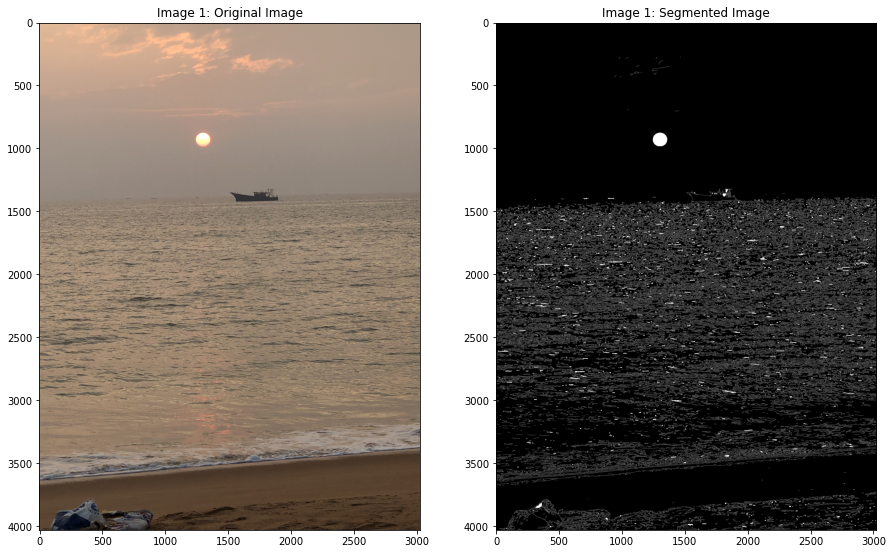

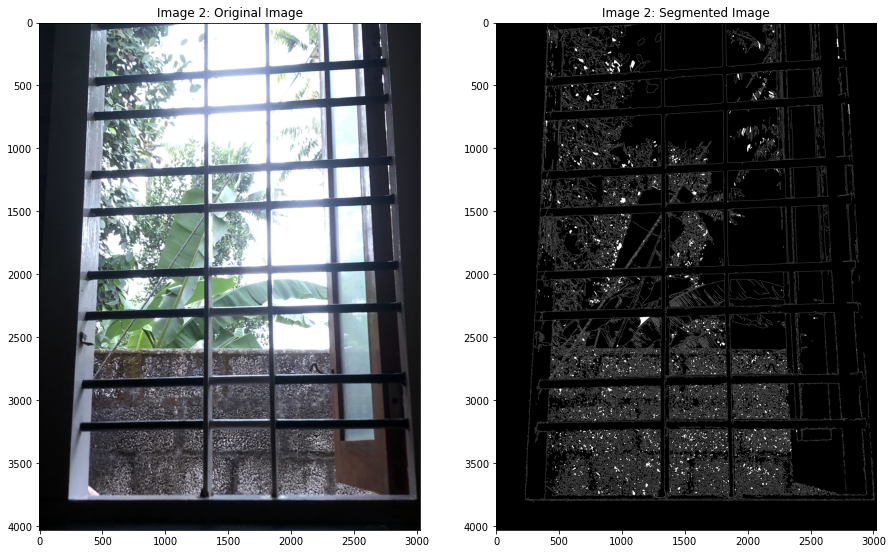

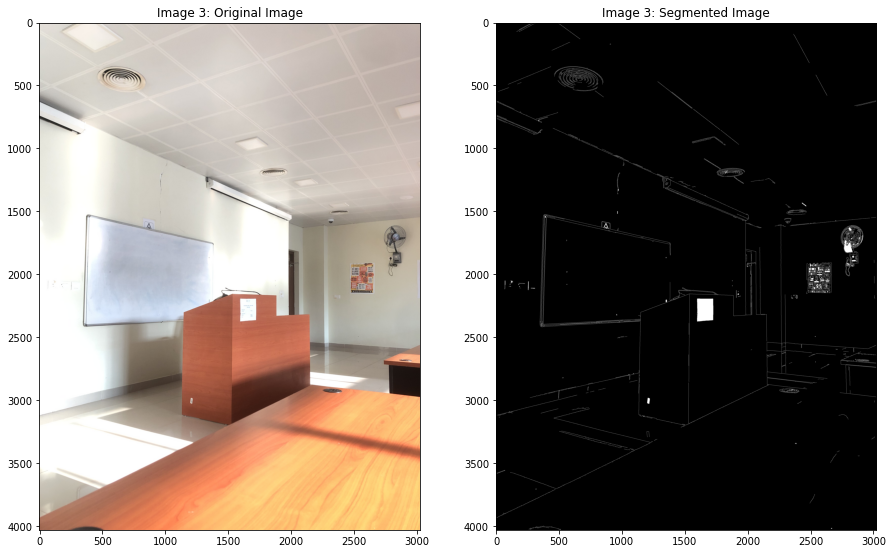

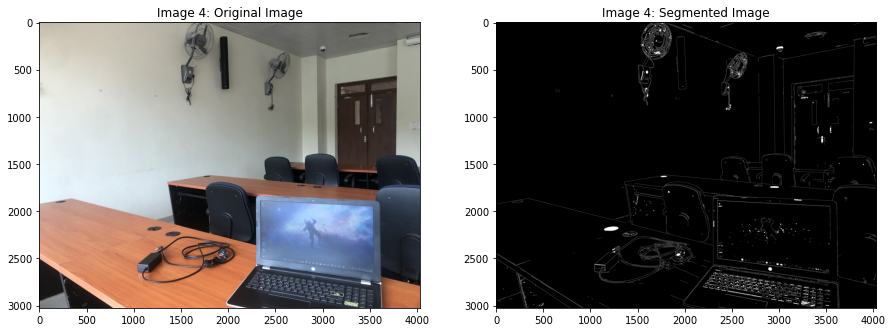

In [4]:
# Performing edge based segmentation and displaying output iteratively to all imges that stacked on a list.

## Enumerate used to loop through list and get counter as list index of corresponding element
for i, img in enumerate([img1, img2, img3, img4]):
    
    ## creating a copy from which line will be segmented
    img_copy = img.copy()
    
    ## calling 'edge_based_segment' function on image
    out_img = edge_based_segment(img_copy)
    
    ## Plotting original and segmented images
    ## setting figure canvas size
    plt.figure(figsize=(15, 15))
    
    ## setting subplot position for 1st figure in a row
    plt.subplot(121)
    ## image plot title
    title1 = 'Image '+str(i+1)+': Original Image'
    plt.title(title1)
    ## showing original image in gray backgroud
    plt.imshow(img, cmap = 'gray')
    
    ## setting subplot position for 2st figure in a row
    plt.subplot(122)
    ## image plot title
    title2 = 'Image '+str(i+1)+': Segmented Image'
    plt.title(title2)
    ## showing segmented image in gray backgroud
    plt.imshow(out_img, cmap = 'gray')
    
    ## showing entire figure canvas
    plt.show()

## b.  Region Segmentation

In [6]:
# defining 'region_based_segment' function for performing region based segmentation
def region_based_segment(img):
    img_gray = rgb2gray(img)
    ## generating an elevation map using sobel filter
    elevation_map = sobel(img_gray)
    ## creating a marker array
    markers = np.zeros_like(img_gray)
    markers[img_gray < 0.1171875] = 1 # 30/255
    markers[img_gray > 0.5859375] = 2 # 150/255
    # Perform watershed region segmentation
    segmentation = morphology.watershed(elevation_map, markers)
    label_rock, _ = nd.label(segmentation)
    # overlay image with different labels
    image_label_overlay = label2rgb(label_rock, image=img_gray)
    
    plt.figure(figsize=(15, 15))
    plt.subplot(121)
    plt.title('Original Image')
    plt.imshow(img)
    
    plt.subplot(122)
    plt.title('Segmented Image')
    plt.imshow(img_gray)
    plt.contour(segmentation, [0.8], linewidths=1.8, colors='w')
    
    plt.show()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: No contour levels were found within the data range.


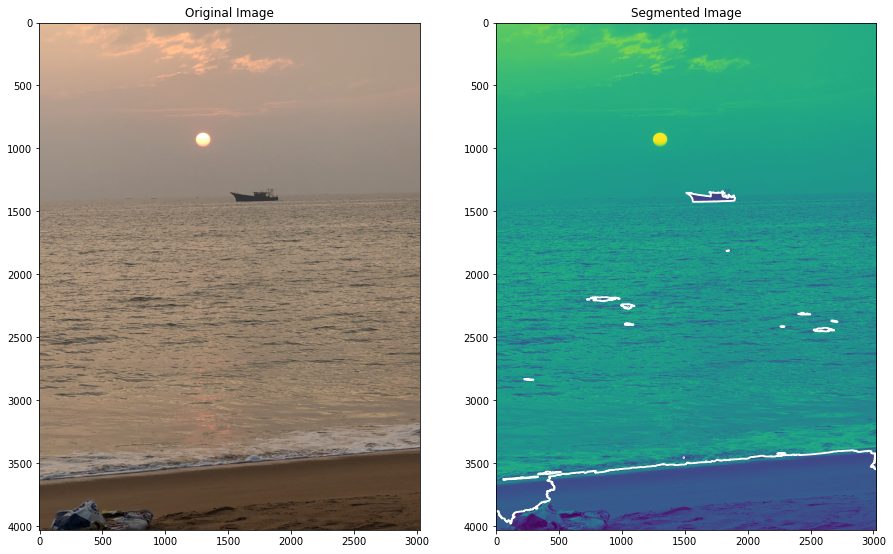

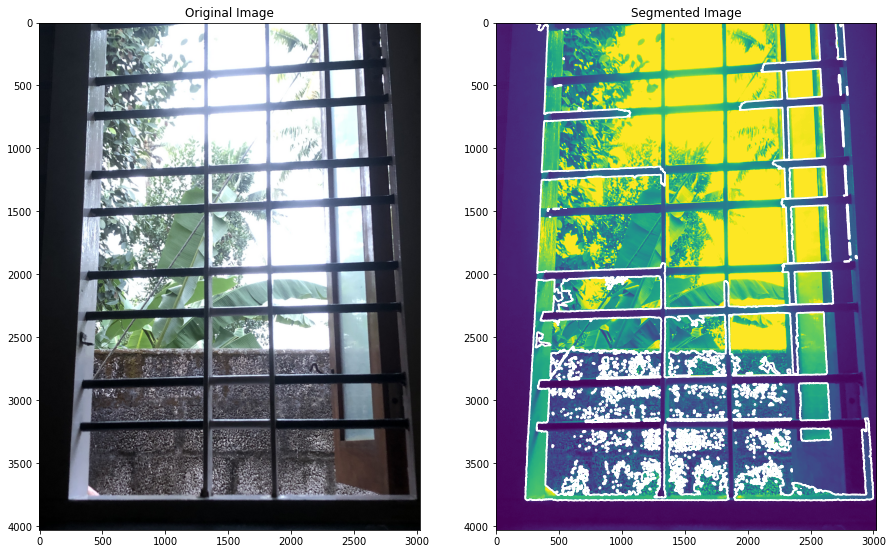

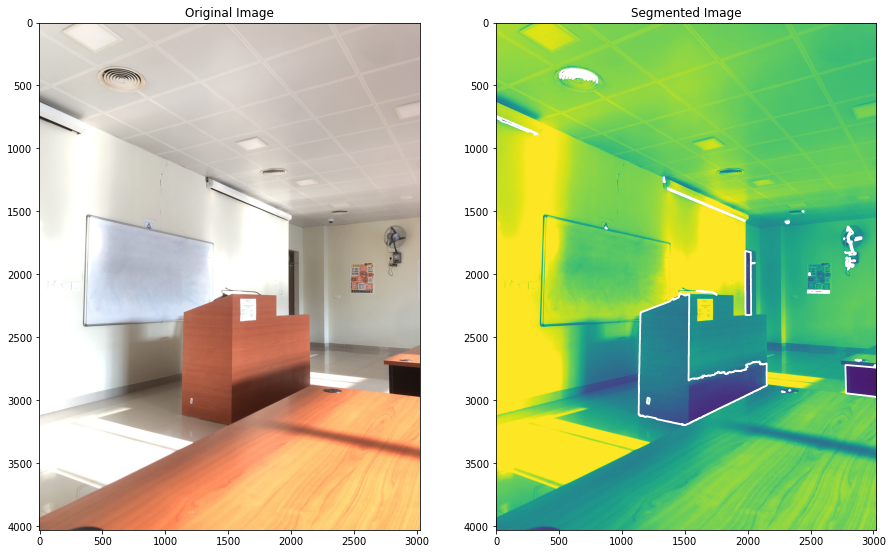

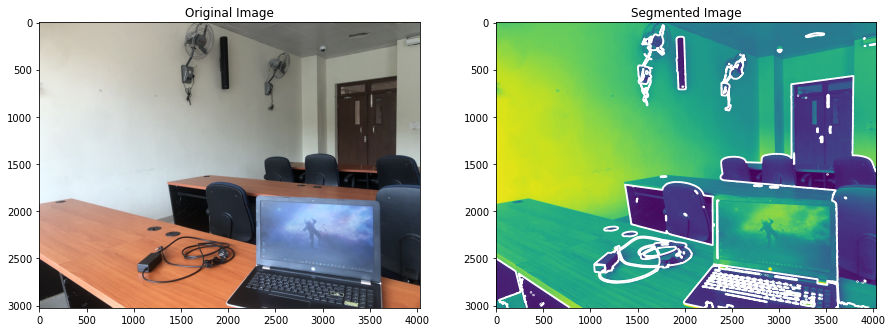

In [7]:
# Performing line detection and displaying detection iteratively to all imges that stacked on a list.

## Enumerate used to loop through list and get counter as list index of corresponding element
for i, img in enumerate([img1, img2, img3, img4]):
    
    ## creating a copy from which line will be detected.
    img_copy = img.copy()
    
    ## calling 'detect_line' function on image.
    region_based_segment(img_copy)

Ref: https://www.geeksforgeeks.org/region-and-edge-based-segmentaion/